In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter
from wordcloud import WordCloud, STOPWORDS
import sys, email, string
from nltk.stem import WordNetLemmatizer
import nltk
import os, gc, re
from IPython.display import Markdown, display
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')

In [3]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [4]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [5]:
df['text'] = df['text'].apply(lambda string: clean_str(string))

In [6]:
def rem_sub(i):
    return i.replace('subject', '')
df['text'] = df['text'].map(rem_sub)

In [7]:
df.head()
df.shape

(5171, 4)

In [8]:
x = df['text']
Y = df.label_num

In [9]:
print(x[0])
print(x.shape)

 enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes
(5171,)


In [10]:
spam=[]
ham=[]
def split():
    for i in range(0,len(x)):
        if(df['label_num'][i]==0):
            ham.append(x[i])
        else:
            spam.append(x[i])
split()
print(ham[0])

 enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes


Short Text Classification: A Survey


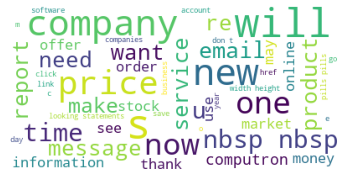

In [11]:

stopwords = set(STOPWORDS)
print('Short Text Classification: A Survey')
#print(Counter(word_count(str(spam))).most_common(100))
for i in range (0,len(x)):
    text=' '.join(spam)
    
cloud = WordCloud(
    max_font_size=50,
    background_color='white',
    max_words=50
    ).generate(text)
fig = plt.figure(1)
plt.imshow(cloud)
plt.axis('off')
plt.show()
fig.savefig("Short_Text_Classification")

Short Text Classification: A Survey


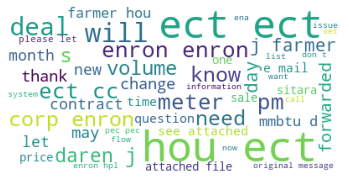

In [12]:
stopwords = set(STOPWORDS)
print('Short Text Classification: A Survey')
#print(Counter(word_count(str(spam))).most_common(100))
for i in range (0,len(x)):
    text1=' '.join(ham)
    
cloud = WordCloud(
    max_font_size=50,
    background_color='white',
    max_words=50
    ).generate(text1)
fig = plt.figure(1)
plt.imshow(cloud)
plt.axis('off')
plt.show()
fig.savefig("Short_Text_Classification")

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x)

# Get the categories
y = df.label


In [14]:
print(x[0])

  (0, 14014)	1
  (0, 26332)	1
  (0, 26325)	1
  (0, 40282)	2
  (0, 21666)	2
  (0, 16145)	1
  (0, 42124)	1
  (0, 40663)	2
  (0, 40160)	1
  (0, 28511)	1
  (0, 17060)	1
  (0, 45238)	2
  (0, 29224)	1
  (0, 27019)	1
  (0, 31984)	1
  (0, 16034)	1
  (0, 10583)	1
  (0, 32527)	1
  (0, 6061)	1
  (0, 10526)	1
  (0, 31355)	1
  (0, 29788)	1
  (0, 31615)	1
  (0, 10428)	2
  (0, 43171)	1
  (0, 32049)	1
  (0, 45469)	1
  (0, 33952)	1
  (0, 439)	1
  (0, 6337)	1
  (0, 28852)	1
  (0, 16582)	1
  (0, 17005)	1
  (0, 9237)	1
  (0, 7206)	1
  (0, 27917)	1
  (0, 2542)	1
  (0, 16206)	1
  (0, 13193)	1
  (0, 32771)	1


In [15]:
print(x.shape)

(5171, 45740)


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state =20)


In [17]:
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (4136, 45740)
Testing X Shape: (1035, 45740)


In [18]:
Accuracy=[]
Duration=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
start = perf_counter()
logreg=LogisticRegression(solver='liblinear')
logreg=logreg.fit(x_train,y_train)
prediction=logreg.predict(x_test)
Accuracy.append(accuracy_score(prediction,y_test))
print(Accuracy[0])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[0])

0.9768115942028985
0.46


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
start = perf_counter()
clf = MultinomialNB()
clf.fit(x_train, y_train)
naive_predict=clf.predict(x_test)
Accuracy.append(accuracy_score(naive_predict,y_test))
print(Accuracy[1])
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[1])

0.9806763285024155
0.03


In [20]:
from sklearn.ensemble import RandomForestClassifier
start = perf_counter()
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
forest_clf.fit(x_train,y_train)
ran_pred=forest_clf.predict(x_test)
Accuracy.append(accuracy_score(ran_pred,y_test))
print(Accuracy[2])
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[2])

0.7816425120772947
1.04


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
start = perf_counter()
tree = DecisionTreeClassifier(criterion='entropy') # function to measure the quality of split 
tree.fit(x_train,y_train)
ran=tree.predict(x_test)
Accuracy.append(accuracy_score(ran,y_test))
print(Accuracy[3])
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[3])

0.9536231884057971
0.82


In [22]:
model=["LogisticRegression", "MultinomialNB","RandomForestClassifier", "DecisionTreeClassifier"]
models_acc = []
for i in range(0,4):
    models_acc.append([model[i],Accuracy[i],Duration[i]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy,Training time (sec)
0,MultinomialNB,0.980676,0.03
1,LogisticRegression,0.976812,0.46
2,DecisionTreeClassifier,0.953623,0.82
3,RandomForestClassifier,0.781643,1.04


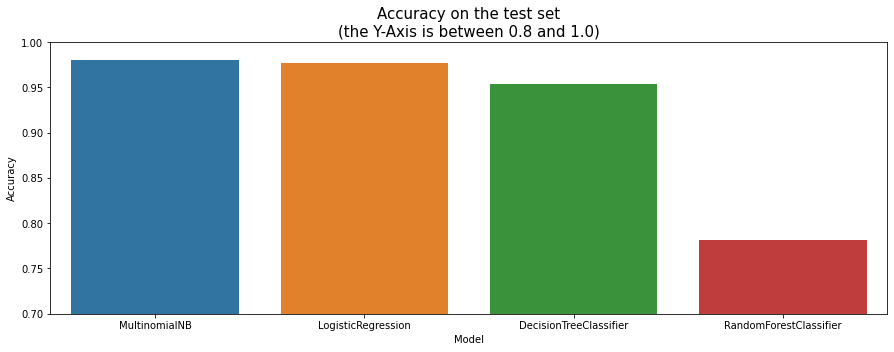

In [23]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.7,1)
plt.show()

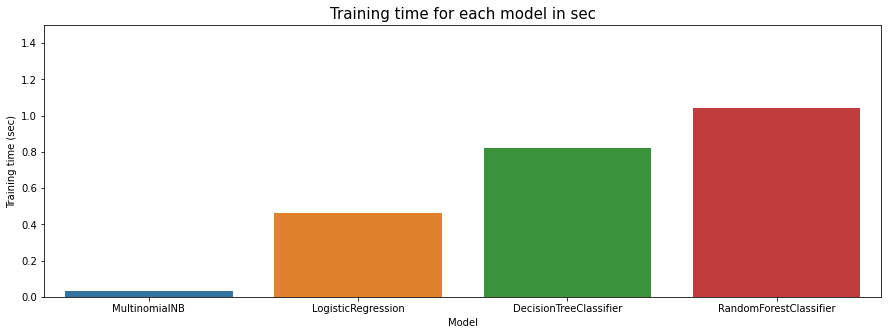

In [24]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,1.5)
plt.show()

In [25]:
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
def display_result(df, number=2):
    for i in range(number):
        msg = df['text'].iloc[i]
        label = df["label"].iloc[i]
        msg_vec = cv.transform([msg])
        pred_label = model.predict(msg_vec)
        printmd(f"**Real: {label}, Predicted: {pred_label[0]}**")
        printmd(f"**E-Mail: {msg}**")
        printmd("_______________________________________________________________")
        print()
        print()
        
    
df_spam = df[df['label'] == 'spam']
df_ham = df[df['label'] == 'ham']
display_result(df_spam)
display_result(df_ham)

**Real: spam, Predicted: spam**

**E-Mail:  photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin**

_______________________________________________________________

**Real: spam, Predicted: spam**

**E-Mail:  looking for medication we re the best source it is difficult to make our material condition better by the best law but it is easy enough to ruin it by bad laws excuse me you just found the best and simpliest site for medication on the net no perscription easy delivery private secure and easy better see rightly on a pound a week than squint on a million we ve got anything that you will ever want erection treatment pills anti depressant pills weight loss and more http splicings bombahakcx com knowledge and human power are synonymous only high quality stuff for low rates moneyback guarantee there is no god nature sufficeth unto herself in no wise hath she need of an author**

_______________________________________________________________

**Real: ham, Predicted: ham**

**E-Mail:  enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes**

_______________________________________________________________

**Real: ham, Predicted: ham**

**E-Mail:  hpl nom for january see attached file hplnol xls hplnol xls**

_______________________________________________________________